In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

24.362811174005287 106.21762895168303
-45.404414589095026 -128.01137545881733
25.761792900889304 -92.83557983560664
-64.4050119607297 -82.51491247070084
42.06368943724004 -171.9606083533506
-42.44203632912635 -47.406299827010116
47.847469765599556 17.080046890208052
35.338319157172236 76.94652666388254
-56.77398186320995 -72.44102656123073
28.175631104737718 67.15021801432007
-31.440982099169226 -8.4576960944446
-14.848166088642373 159.58130364908254
-32.431545361119056 133.28983915576538
-39.903593084885905 86.31922093614327
15.441466659560646 154.89940143323105
34.407881360508966 -126.90162126584211
74.97318623935539 81.61511844806324
85.54265098393441 97.36359316409153
29.34322836457092 1.7337358595730734
-60.86885397420233 -16.301724272484932
79.4788976011867 -1.0590329587794542
-79.65819374246594 -127.12390729337774
-89.51769085247328 135.3403433182183
-26.751773094602264 -154.60619140987797
72.80430699182185 21.52707204965398
-5.77083282362797 25.635333454430594
-7.40689694064241

-8.638150459532554 78.13766875081944
34.28867513284639 34.75631806766077
50.93247085111278 -156.65897688826664
56.36377430275846 112.23743127705563
1.4631062342835577 75.30936496688125
48.17917993933068 -93.65664707480427
-58.704088490976154 -144.2435769511421
-18.826549748537843 12.603702904076641
63.11327047774722 -35.120984742565724
-68.02280239939445 -94.21617528219052
74.08631091777028 -38.65508586104178
82.62915954007454 -156.93521783583478
46.757316420408955 37.43093788537121
57.14433354955278 168.28403078587166
-67.79166047928061 103.58665268560338
-13.040730911769302 -93.61617600829784
76.94703180539199 -175.08213436846472
44.29939270656868 -160.03298764413188
84.90188316629096 -97.07910585832113
58.091962781383415 -175.19558060583995
-84.79152870012184 -65.4424533255843
-66.00419566334158 147.44096193882643
-26.15791488498415 -122.71402747311491
-69.64844356983855 60.8030069117348
-47.93347227978651 147.20911595384325
-45.231366720162015 9.670689983082838
88.39240430889691 -3

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # enumerate() method references the index and the city in the list.

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bose
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | galveston
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | janossomorja
Processing Record 8 of Set 1 | kargil
Processing Record 9 of Set 1 | khuzdar
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | flinders
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | half moon bay
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | adrar
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | avera
Processing Record 23 of

Processing Record 35 of Set 4 | san pedro
Processing Record 36 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 4 | marzuq
Processing Record 38 of Set 4 | henties bay
Processing Record 39 of Set 4 | caconda
Processing Record 40 of Set 4 | lata
Processing Record 41 of Set 4 | cam ranh
Processing Record 42 of Set 4 | lanigan
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | sept-iles
Processing Record 45 of Set 4 | chifeng
Processing Record 46 of Set 4 | ondorhaan
City not found. Skipping...
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | develi
Processing Record 49 of Set 4 | tual
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | honiara
Processing Record 2 of Set 5 | candawaga
City not found. Skipping...
Processing Record 3 of Set 5 | santa marta
Processing Record 4 of Set 5 | marystown
Processing Record 5 of Set 5 | tidore
City not found. Skipping...
Processing Rec

Processing Record 24 of Set 8 | hille
Processing Record 25 of Set 8 | porbandar
Processing Record 26 of Set 8 | aklavik
Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | port maria
Processing Record 29 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 8 | ullal
Processing Record 31 of Set 8 | vanimo
Processing Record 32 of Set 8 | mantua
Processing Record 33 of Set 8 | dickinson
Processing Record 34 of Set 8 | matagami
Processing Record 35 of Set 8 | kohlu
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | tevriz
Processing Record 38 of Set 8 | changde
Processing Record 39 of Set 8 | longyearbyen
Processing Record 40 of Set 8 | taltal
Processing Record 41 of Set 8 | halalo
City not found. Skipping...
Processing Record 42 of Set 8 | grindavik
Processing Record 43 of Set 8 | ikungi
Processing Record 44 of Set 8 | rungata
City not found. Skipping...
Processing Record 45 of Set 8 | cabo san lucas
Processing Record 46

Processing Record 12 of Set 12 | sur
Processing Record 13 of Set 12 | pathein
Processing Record 14 of Set 12 | mehamn
Processing Record 15 of Set 12 | deputatskiy
Processing Record 16 of Set 12 | trapani
Processing Record 17 of Set 12 | karamea
City not found. Skipping...
Processing Record 18 of Set 12 | olafsvik
Processing Record 19 of Set 12 | sakaiminato
Processing Record 20 of Set 12 | kununurra
Processing Record 21 of Set 12 | nynashamn
Processing Record 22 of Set 12 | jurado
Processing Record 23 of Set 12 | bull savanna
Processing Record 24 of Set 12 | pokrovsk-uralskiy
City not found. Skipping...
Processing Record 25 of Set 12 | nicoya
Processing Record 26 of Set 12 | conde
Processing Record 27 of Set 12 | chissamba
Processing Record 28 of Set 12 | kushmurun
Processing Record 29 of Set 12 | ashington
Processing Record 30 of Set 12 | nanortalik
Processing Record 31 of Set 12 | nashua
Processing Record 32 of Set 12 | kirovskiy
Processing Record 33 of Set 12 | lar
Processing Record

In [8]:
len(city_data)

553

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bose,45.4612,8.0137,75.29,71,34,4.59,IT,2022-07-21 03:17:06
1,Rikitea,-23.1203,-134.9692,73.20,77,0,6.24,PF,2022-07-21 03:17:07
2,Galveston,29.3669,-94.9669,86.05,81,33,4.00,US,2022-07-21 03:17:07
3,Punta Arenas,-53.1500,-70.9167,30.31,86,20,18.41,CL,2022-07-21 03:13:43
4,Bethel,41.3712,-73.4140,79.75,78,1,3.96,US,2022-07-21 03:17:07
5,Rocha,-34.4833,-54.3333,59.07,95,71,9.48,UY,2022-07-21 03:14:40
6,Janossomorja,47.7862,17.1360,73.20,45,8,6.44,HU,2022-07-21 03:17:08
7,Kargil,34.5667,76.1000,65.97,15,91,6.15,IN,2022-07-21 03:17:08
8,Khuzdar,27.7384,66.6434,78.75,62,80,6.62,PK,2022-07-21 03:17:08
9,Jamestown,42.0970,-79.2353,78.44,69,100,10.36,US,2022-07-21 03:16:49


In [10]:
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed'] 
city_data_df=city_data_df[new_column_order]
city_data_df.head(5)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bose,IT,2022-07-21 03:17:06,45.4612,8.0137,75.29,71,34,4.59
1,Rikitea,PF,2022-07-21 03:17:07,-23.1203,-134.9692,73.20,77,0,6.24
2,Galveston,US,2022-07-21 03:17:07,29.3669,-94.9669,86.05,81,33,4.00
3,Punta Arenas,CL,2022-07-21 03:13:43,-53.1500,-70.9167,30.31,86,20,18.41
4,Bethel,US,2022-07-21 03:17:07,41.3712,-73.4140,79.75,78,1,3.96


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatter Plot

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


#### Max Temp

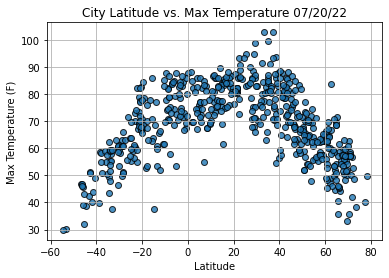

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Humidity

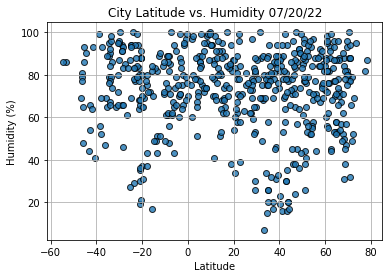

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

#### Cloudiness

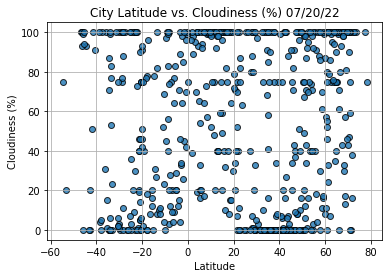

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

#### Wind Speed

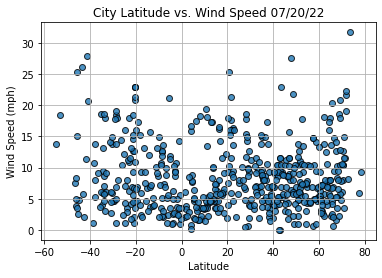

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Correlation 

### Linear Regression Function

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [20]:
index13 = city_data_df.loc[13]
index13

City                      Kavieng
Country                        PG
Date          2022-07-21 03:17:10
Lat                       -2.5744
Lng                      150.7967
Max Temp                    83.07
Humidity                       75
Cloudiness                     98
Wind Speed                  10.71
Name: 13, dtype: object

In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Rikitea,PF,2022-07-21 03:17:07,-23.1203,-134.9692,73.20,77,0,6.24
3,Punta Arenas,CL,2022-07-21 03:13:43,-53.1500,-70.9167,30.31,86,20,18.41
5,Rocha,UY,2022-07-21 03:14:40,-34.4833,-54.3333,59.07,95,71,9.48
10,Kirakira,SB,2022-07-21 03:17:09,-10.4544,161.9205,85.05,71,23,8.68
11,Flinders,AU,2022-07-21 03:17:09,-34.5833,150.8552,62.19,79,87,4.00
...,...,...,...,...,...,...,...,...,...
539,Te Anau,NZ,2022-07-21 03:31:16,-45.4167,167.7167,42.98,86,94,2.62
540,Paramonga,PE,2022-07-21 03:31:16,-10.6667,-77.8333,61.72,86,69,9.08
542,Itarema,BR,2022-07-21 03:31:17,-2.9248,-39.9167,73.67,86,34,9.33
545,Vallenar,CL,2022-07-21 03:32:18,-28.5708,-70.7581,60.96,66,100,4.99


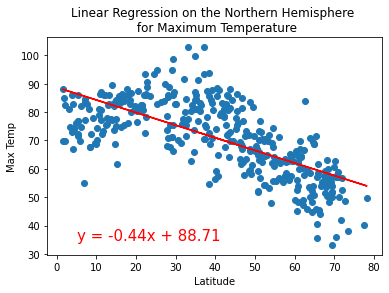

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',
                       (5,35))

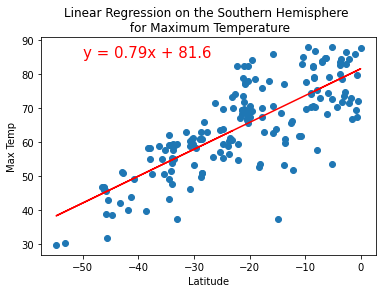

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))


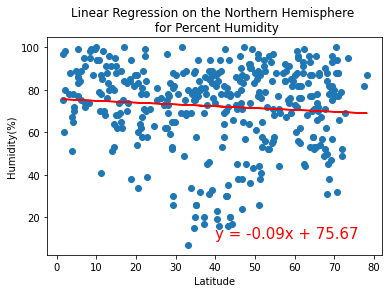

In [37]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Percent Humidity', 'Humidity(%)',(40,10))


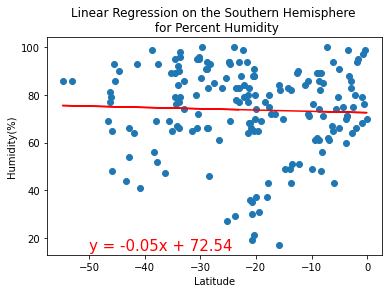

In [39]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Percent Humidity', 'Humidity(%)',(-50,15))


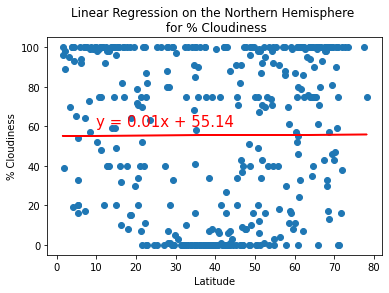

In [43]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))


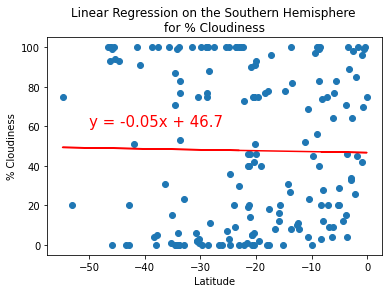

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

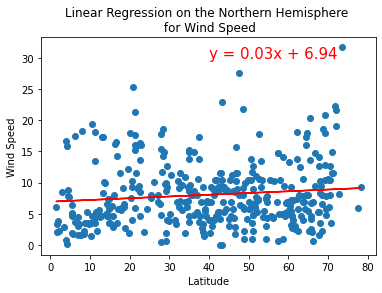

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))


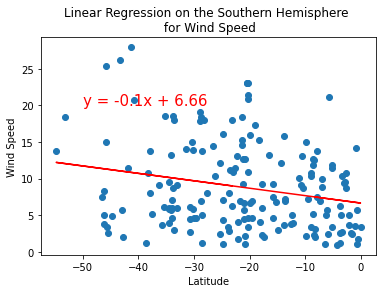

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))
                                                                                                       